# End-to-end Multi-class Dog Breed Classification 



This notebook build an end-to-end multi-classification image classifier using TensorFlow 2.0 and TensorFlow Hub. 


## 1. Problem 

Identifying the breed of a dog given an image of a dog. If I take a photo of a dog I want to know what breed of dog it is. 

## 2. Data

The data we are using is from Kaggle's dog breed identification competition. 
https://www.kaggle.com/c/dog-breed-identification/data 

## 3. Evaluation 

Accuracy is important for determining the success of a model for this type of multi-classification model. 

## 4. Features 

* We're dealing with images (unstructured data)so it's probably best to use deel learning/transfer learning.
* There are 120 breeds of dogs. 
* There are around 10,000+ images in the training and testing set.  

# New Section

### Get our workshop ready
- unzip data
- Import tensorflow 2.X
- Import tensorflow Hub

In [1]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/dog-breed-identification"

In [2]:
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for CPU availablity 
print("CPU", "available(YESSSS!!!!)"if tf.config.list_physical_devices("GPU")else "not available:(")

TF version: 2.4.1
TF Hub version: 0.12.0
CPU available(YESSSS!!!!)


# Getting out data ready (turning into Tensors)

With all the machine learning models, our data has to be numerical format. Turning our images into Tensors first(numerical expressions).

In [3]:
# Checkout the labes of our data
import pandas as pd

labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/labels.csv")

In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     952ee6aa4050c9593c2bcb2baf54b266  scottish_deerhound
freq                                   1                 126


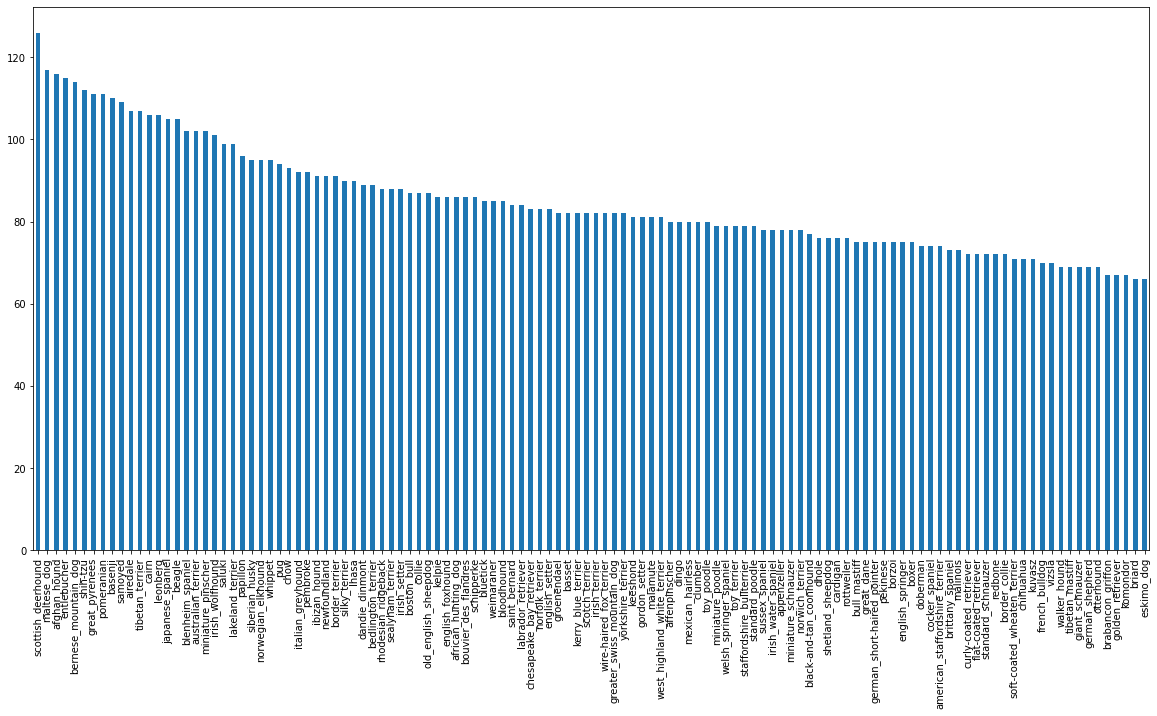

In [6]:
# How any images are there for each breed? 

labels_csv['breed'].value_counts().plot.bar(figsize = (20,10))

In [7]:
labels_csv["breed"].value_counts().median()

82.0

In [17]:
# Lets view an image 

from IPython.display import Image 
Image("drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpeg")

# Getting images and labels 


In [19]:
filenames = ["drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train" + fname + ".jpg" for fname in labels_csv["id"]]

# Check first 10 
filenames

['drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/dog-b

In [20]:
# Check number of file names matches 
import os
if len(os.listdir("/content/drive/MyDrive/Dog Vision/dog-breed-identification/dog-breed-identification/train")) == len(filenames):
  print("filenames match actual amount of files!! Proceed.")
else: 
  print("Filenames do not match amount of files, check the target directory")

filenames match actual amount of files!! Proceed.


In [22]:
Image(filenames[9000])

# Turning our labels into numeric. Let us prepare our labels 

In [25]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [27]:
len(labels)

10222

In [31]:
# See if the number of labels matches the number of filenames 
if len(labels) == len(filenames):
   print("Number of labels matches number of filenames!")
else:
    print("Number of labels does not match number of filenames, check data direction")

Number of labels matches number of filenames!


In [33]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [34]:
# Turn a single label into an array of booleans 
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [35]:
# Turn every label into an boolean array 
boolean_labels = [labels == unique_breeds for labels in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [36]:
len(boolean_labels)

10222

In [39]:
# Turning boolean array into Int
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
